In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud , STOPWORDS
import seaborn as sns

## Davidson Dataset

In [26]:
import pandas as pd
labeled_data = pd.read_csv("/content/labeled_data.csv")
labeled_data = labeled_data.rename(columns={"tweet": "Text"})
labeled_data = labeled_data.rename(columns={"class": "label"})
labeled_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,Text
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [27]:
labeled_data['label'].value_counts()

1    19190
2     4163
0     1430
Name: label, dtype: int64

In [28]:
labeled_data['label'] = labeled_data['label'].replace([2], 1)
labeled_data['label'].value_counts()

1    23353
0     1430
Name: label, dtype: int64

In [29]:
labeled_data.label = labeled_data.label.replace([0, 1], [1, 0])
labeled_data.label.value_counts()

0    23353
1     1430
Name: label, dtype: int64

In [30]:
labeled_data

,Unnamed: 0,count,hate_speech,offensive_language,neither,label,Text
0,0,3,0,0,3,0,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,0,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,0,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,0,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,0,youu got wild bitches tellin you lies


In [31]:
labeled_data = labeled_data[['Text', 'label']]

## Waseem Dataset

In [32]:
waseem = pd.read_csv("/content/Waseem.csv")
waseem = waseem.rename(columns={"text": "Text"})
waseem = waseem[['Text', 'label']]
#waseem = waseem[waseem['label']== 1]
waseem

,Text,label
0,Drasko they didn't cook half a bird you idiot ...,1
1,Hopefully someone cooks Drasko in the next ep ...,0
2,of course you were born in serbia...you're as ...,1
3,These girls are the equivalent of the irritati...,1
4,#MKR Lost the plot - where's the big Texan wit...,1
...,...,...
14137,RT @whereshumanity1: Happy at last :smiling_fa...,0
14138,RT @JakeM_1998: RT BillSpindle: It's all about...,0
14139,RT @ThePatriot143: DEAR STATE DEPARTMENT: WHER...,0
14140,@panelrific: Let's go :penguin::penguin::pengu...,0


In [33]:
waseem['label'].value_counts()

0    13649
1      493
Name: label, dtype: int64

In [34]:
warner = pd.read_csv("/content/Warner.csv")
warner = warner[['Text', 'label']]
#warner = warner[warner['label']== 1]
warner

,Text,label
0,KILL ALL NIGGERS oops WRONG FORUM BUT HEY ...,1
1,I give u a damn goddamed Indian nerds. U dirty...,1
2,PM Rate + Mod Options Edit Quote Reply [ IMG ]...,1
3,Pointing out that Muslims are useless parasite...,1
4,We need more niggas like this nigga right here...,1
...,...,...
1264,wpe25918.gif ( 228067 bytes ),0
1265,By Dalai 1170071177 2267646 * 3 * just want u ...,0
1266,@yousufpoosuf @RKingLive2Dance @izrinhariri Bu...,1
1267,@ibnHlophe @eeviewonders @CTFleaMarkets Your t...,1


## Founta Dataset

In [35]:
founta = pd.read_csv("/content/founta_full_data.csv")
founta = founta.rename(columns={"text": "Text"})
#founta = founta[founta['label']== 1]
founta

,Text,label
0,RT @MailOnline: The Nazi death gas so horrific...,0
1,Carlos Correa had gyalchester as his walkup mu...,0
2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...
59314,We are in a comfortable lead fight against gal...,1
59315,Took him less than a minute...!! Gutless grub!...,1
59316,"@sanfordbilly This isn't ""making war"" here. We...",1
59317,Ron Paul: 'Zero Chance' Assad Behind Syria Che...,1


## HASOC Dataset

In [36]:
hasoc = pd.read_csv("/content/hasoc2020_en_train_new.csv", encoding='cp1252')
hasoc = hasoc.rename(columns={"text": "Text"})
hasoc

,tweet_id,Text,task1,task2,ID
0,1.123757e+18,hate wen females hit ah nigga with tht bro ???...,HOF,PRFN,hasoc_2020_en_2574
1,1.123733e+18,RT @airjunebug: When you're from the Bay but y...,HOF,PRFN,hasoc_2020_en_3627
2,1.123734e+18,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,NOT,NONE,hasoc_2020_en_3108
3,1.126951e+18,RT @SheLoveTimothy: He ain’t on drugs he just ...,HOF,PRFN,hasoc_2020_en_3986
4,1.126864e+18,RT @TavianJordan: Summer ‘19 I’m coming for yo...,NOT,NONE,hasoc_2020_en_5152
...,...,...,...,...,...
3703,1.126887e+18,RT @FilthyArt_: TONIGHT TONIGHT TONIGHT \n\nCa...,NOT,NONE,hasoc_2020_en_109
3704,1.126826e+18,RT @abbn0rmal_: Eat my ass,HOF,PRFN,hasoc_2020_en_2345
3705,1.126880e+18,RT @FlyTPA: BREAKING NEWS: TPA is about to get...,NOT,NONE,hasoc_2020_en_1039
3706,1.130291e+18,RT @StarrThaRapper: It’s been a hr FUCK THAT G...,HOF,PRFN,hasoc_2020_en_2817


In [37]:
hasoc.task1.value_counts()

HOF    1856
NOT    1852
Name: task1, dtype: int64

In [38]:
#hasoc = hasoc[hasoc['task2'] == 'HATE']
hasoc = hasoc.rename(columns={"task1": "label"})
hasoc['label'] = hasoc['label'].map({'HOF': 1, 'NOT': 0})
#hasoc['label'] = 1
hasoc = hasoc[['Text', 'label']]
hasoc.head()

,Text,label
0,hate wen females hit ah nigga with tht bro ???...,1
1,RT @airjunebug: When you're from the Bay but y...,1
2,RT @DonaldJTrumpJr: Dear Democrats: The Americ...,0
3,RT @SheLoveTimothy: He ain’t on drugs he just ...,1
4,RT @TavianJordan: Summer ‘19 I’m coming for yo...,0


In [39]:
# Joining 2 dataframes Dataset1, Dataset2
frames = [founta,waseem,warner,hasoc,labeled_data]
hatespeech = pd.concat(frames)

In [40]:
hatespeech = hatespeech.reset_index(drop=True)

In [41]:
mydata = hatespeech.copy()

In [42]:
mydata

,Text,label
0,RT @MailOnline: The Nazi death gas so horrific...,0
1,Carlos Correa had gyalchester as his walkup mu...,0
2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0
3,RT @HeeeyMonica: Papaya has to be the worst fr...,0
4,@Pineaqples @DenialEsports btw I watched where...,0
...,...,...
103216,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,0
103217,"you've gone and broke the wrong heart baby, an...",0
103218,young buck wanna eat!!.. dat nigguh like I ain...,0
103219,youu got wild bitches tellin you lies,0


## FINAL Dataset for Hatespeech Detection

In [ ]:
mydata.to_csv("Final_hate")

In [43]:
hatespeech.iloc[0].Text

'RT @MailOnline: The Nazi death gas so horrific even Hitler feared using it'

In [44]:
hatespeech.label.value_counts()

0    90823
1    12398
Name: label, dtype: int64

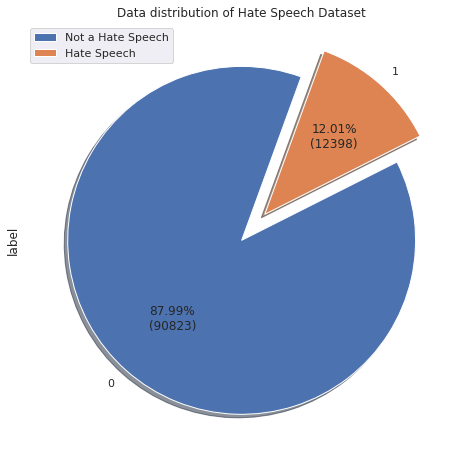

In [46]:
# Visualizing in Pie Chart 
import seaborn as sns
x = hatespeech.label.value_counts()
sns.set()
explode = (0, 0.2)
labels = [r'Not a Hate Speech','Hate Speech']
x.plot(kind='pie', title='Data distribution of Hate Speech Dataset', figsize=[8,8],shadow=True, legend=True,
       explode = explode,startangle=70,autopct=lambda p: '{:.2f}%\n({:.0f})'.format(p,(p/100)*x.sum()))
plt.legend(labels, loc="best")
plt.show()

## Plotting & Cleaning Dataset




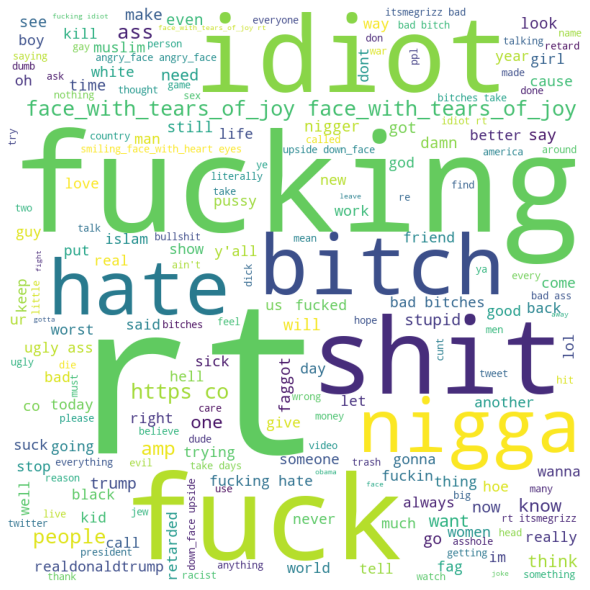

In [47]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in hatespeech[hatespeech['label']==1].Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [48]:
def num_of_words(df, col):
    df['word_ct'] = df[col].apply(lambda x: len(str(x).split(" ")))
    print(df[[col, 'word_ct']])


In [49]:
num_of_words(hatespeech, 'Text')

                                                     Text  word_ct
0       RT @MailOnline: The Nazi death gas so horrific...       13
1       Carlos Correa had gyalchester as his walkup mu...       15
2       "THE FORCE AWAKENS: A Bad Lip Reading" (Featur...       13
3       RT @HeeeyMonica: Papaya has to be the worst fr...       10
4       @Pineaqples @DenialEsports btw I watched where...       18
...                                                   ...      ...
103216  you's a muthaf***in lie &#8220;@LifeAsKing: @2...       19
103217  you've gone and broke the wrong heart baby, an...       13
103218  young buck wanna eat!!.. dat nigguh like I ain...       13
103219              youu got wild bitches tellin you lies        7
103220  ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...       18

[103221 rows x 2 columns]


In [50]:
def avg_word(sentence):
    txt = str(sentence)
    words = txt.split()
    return (sum(len(word) for word in words)/len(words))
    
def avg_word_length(df, col):
    df['avg_wrd'] = df[col].apply(lambda x: avg_word(x))
    print(df[[col, 'avg_wrd']].head())

avg_word_length(hatespeech,'Text')

                                                Text   avg_wrd
0  RT @MailOnline: The Nazi death gas so horrific...  4.769231
1  Carlos Correa had gyalchester as his walkup mu...  5.466667
2  "THE FORCE AWAKENS: A Bad Lip Reading" (Featur...  4.769231
3  RT @HeeeyMonica: Papaya has to be the worst fr...  4.500000
4  @Pineaqples @DenialEsports btw I watched where...  4.777778


In [51]:
hatespeech[:13]

,Text,label,word_ct,avg_wrd
0,RT @MailOnline: The Nazi death gas so horrific...,0,13,4.769231
1,Carlos Correa had gyalchester as his walkup mu...,0,15,5.466667
2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0,13,4.769231
3,RT @HeeeyMonica: Papaya has to be the worst fr...,0,10,4.500000
4,@Pineaqples @DenialEsports btw I watched where...,0,18,4.777778
5,Russia got f… @NikkisBubble Every bird turd i...,0,22,4.761905
6,#Riffotronic Dick Tracy Meets Gruesome - the ...,0,10,5.444444
7,"Up at 2am, still sick, dr. Pissing me off, ugh...",0,19,6.578947
8,Something is deeply wrong with him! That and t...,0,16,4.187500
9,RT @gracefituk: lesson of the day: fight salty...,0,13,6.000000


Text(0.5, 1.0, 'Average Word Length Distribution')

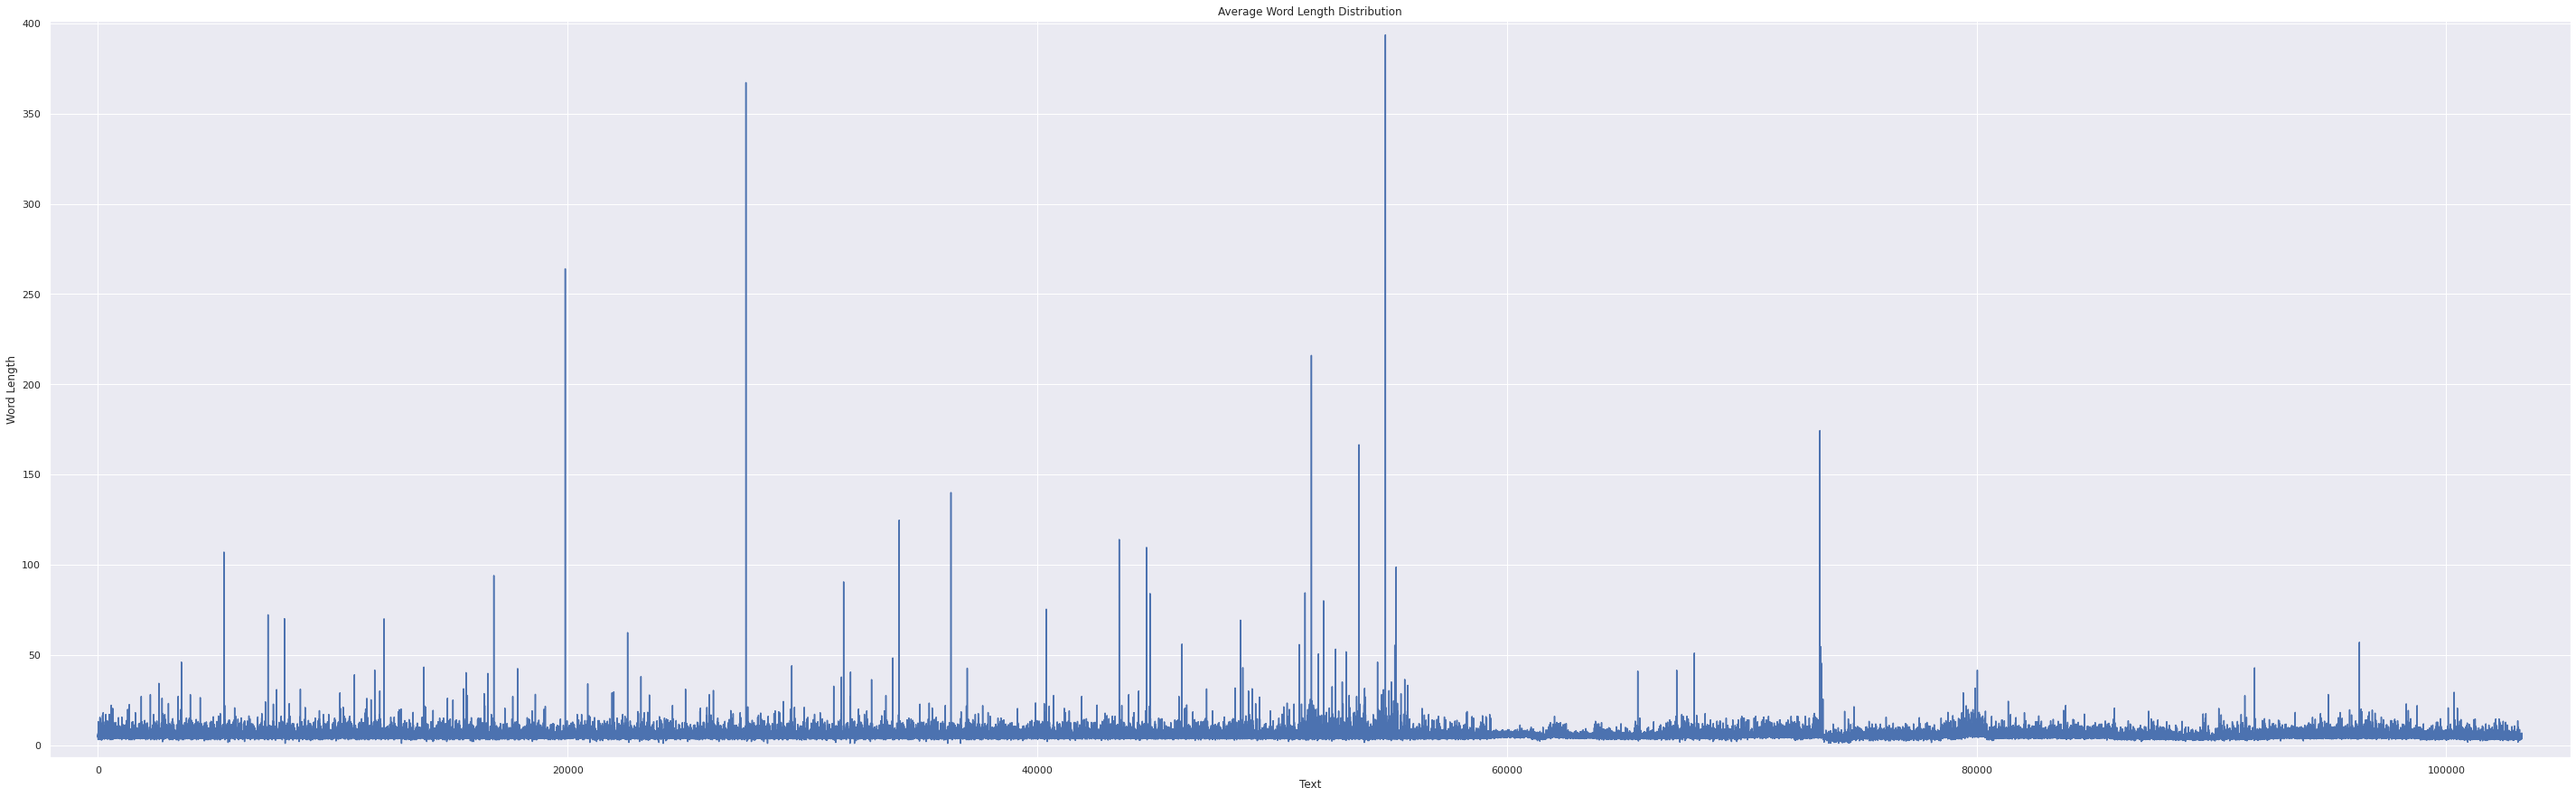

In [52]:
sns.set()
hatespeech['avg_wrd'].plot(kind = "line",figsize=(50, 15))
plt.margins(0.02)
plt.ylabel('Word Length')
plt.xlabel('Text')
plt.title('Average Word Length Distribution')

In [53]:
# Version Copy 1 (After Adding Word Count & Avg Word length) 
df1 = hatespeech.copy()

Short Form to Full Form of IMP Words

In [54]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have",
"u": "you",
"bt" : "but",   
    
}

In [55]:
def preprocess_english(text):
    '''Given a text this function removes the punctuations and returns the remaining text string'''
    new_text = ""
    i = 0
    text = str(text)
    for word in text.split():
        if i==0:
            new_text = CONTRACTION_MAP.get(word,word)
        else:
            new_text = new_text + " " + CONTRACTION_MAP.get(word,word)
        i += 1
    return new_text.replace("'s", '')

In [56]:
df1['Text'] = df1['Text'].apply(lambda x: preprocess_english(x))

In [57]:
df1

,Text,label,word_ct,avg_wrd
0,RT @MailOnline: The Nazi death gas so horrific...,0,13,4.769231
1,Carlos Correa had gyalchester as his walkup mu...,0,15,5.466667
2,"""THE FORCE AWAKENS: A Bad Lip Reading"" (Featur...",0,13,4.769231
3,RT @HeeeyMonica: Papaya has to be the worst fr...,0,10,4.500000
4,@Pineaqples @DenialEsports btw I watched where...,0,18,4.777778
...,...,...,...,...
103216,you a muthaf***in lie &#8220;@LifeAsKing: @20_...,0,19,6.736842
103217,"you have gone and broke the wrong heart baby, ...",0,13,4.461538
103218,young buck wanna eat!!.. dat nigguh like I ain...,0,13,4.230769
103219,youu got wild bitches tellin you lies,0,7,4.428571


Pre-Processing

In [58]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [60]:
import re
def preprocessing_method(df, col_name):
  # Removing Retweets like (... RT @rahul18 ...)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', str(x))) 
  # Removing Mentions like (... @rahul_18 ...)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(@[A-Za-z0-9-_]+)', '', str(x))) 
  # Removing Characters like (... ;:,./@#$%'^ ...)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'[^\w\s]','', str(x))) 
  # Removing Digits except (... Number, BDAY, Date ...)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'^\d+\s|\s\d+\s|\s\d+$', ' ', str(x))) 
  # Removing Unecessary Spaces
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'\s\s+', ' ', str(x))) 
  # Removing Audio, Video Tags
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'(\bQT\b)', '', str(x)))
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'VIDEO:', '', str(x)))
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'AUDIO:', '', str(x)))
  # Removing Links and Bit Links (... http ...)(... bit.ly ...)
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'http\S+', '', str(x)))
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'bit.ly/\S+', '', str(x)))  
  # LowerCasing the whole string at the end
  df[col_name] = df[col_name].apply(lambda x: " ".join(x.lower() for x in x.split()))
  # Remove Amp
  df[col_name] = df[col_name].apply(lambda x: re.sub(r'amp', '', str(x)))
  # Removal of Stop Words and storing it in a new column
  df['Text'] = df[col_name].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
  return df

In [61]:
preprocessing_method(df1,'Text')

,Text,label,word_ct,avg_wrd
0,nazi death gas horrific even hitler feared using,0,13,4.769231
1,carlos correa gyalchester walkup music bad ass...,0,15,5.466667
2,force awakens bad lip reading featuring mark h...,0,13,4.769231
3,papaya worst fruit ever,0,10,4.500000
4,btw watched watched pov stream boii feel retarded,0,18,4.777778
...,...,...,...,...
103216,muthafin lie right tl trash mine bible scriptu...,0,19,6.736842
103217,gone broke wrong heart baby drove redneck crazy,0,13,4.461538
103218,young buck wanna eat dat nigguh like aint fuck...,0,13,4.230769
103219,youu got wild bitches tellin lies,0,7,4.428571


In [62]:
# Version Copy 2 (After Stop Words Removal)
df2 = df1.copy()

In [63]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:
pip install autocorrect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 622 kB 7.3 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=def84199fc04fa4bd1e728c4877f49d4b546d0c1d441b3f831c3bec6a5cd3dc5
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect


In [65]:
df2['Text'][:20]

0      nazi death gas horrific even hitler feared using
1     carlos correa gyalchester walkup music bad ass...
2     force awakens bad lip reading featuring mark h...
3                               papaya worst fruit ever
4     btw watched watched pov stream boii feel retarded
5     russia got f every bird turd talking children ...
6          riffotronic dick tracy meets gruesome reboot
7     2am still sick dr pissing ugh almost spring br...
8               something deeply wrong lying scare hell
9     lesson day fight salty ass hate poems slightly...
10    yang susah itu yang disini dadahati ugly feeli...
11                         praise bad kids abc news via
12    got backyard flock wash hands handling birds d...
13    even though know fake tom luann really sickeni...
14          least outline plot shiz time audience needs
15                                         위너_4일4시_음원공개
16                                         위너_4일4시_음원공개
17              melon winner jumped places artis

In [66]:
from autocorrect import Speller
def spellCheck(df,column_name):
  spell = Speller(fast=True)
  df[column_name] = df[column_name].apply(lambda x : spell(x))


In [67]:
spellCheck(df2,'Text')

In [71]:
df2

,Text,label,word_ct,avg_wrd
0,nazi death gas horrific even hitler feared using,0,13,4.769231
1,carlos cornea gyalchester walkup music bad ass...,0,15,5.466667
2,force awakens bad lip reading featuring mark h...,0,13,4.769231
3,papaya worst fruit ever,0,10,4.500000
4,btw watched watched pov stream boil feel retarded,0,18,4.777778
...,...,...,...,...
103216,muthafin lie right tl trash mine bible scriptu...,0,19,6.736842
103217,gone broke wrong heart baby drove redneck crazy,0,13,4.461538
103218,young buck wanna eat dat nigguh like aint fuck...,0,13,4.230769
103219,you got wild pitches telling lies,0,7,4.428571


In [72]:
# Version Copy 3 (After Stop Words Removal And Spell Correction)
df3 = df2.copy()

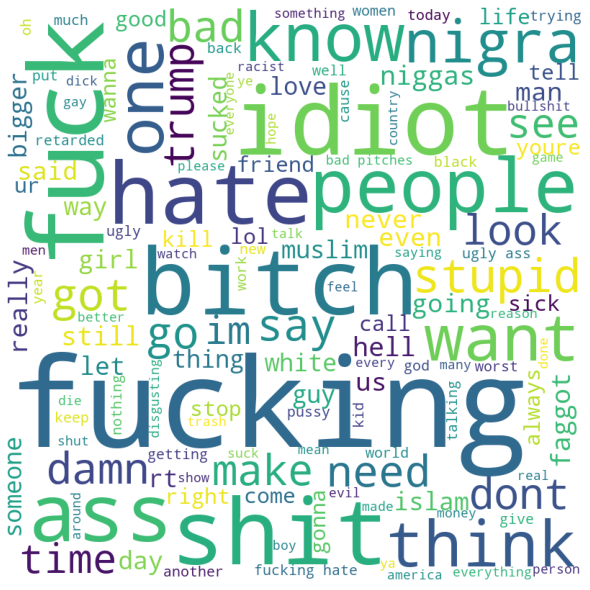

In [73]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in df3[df3['label']==1].Text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Lemmitization & Tokenization

In [79]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [80]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_Tokenize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df = pd.DataFrame(['this was cheesy', 'she likes these books', 'wow this is great'], columns=['text'])
df3['Text'] = df3['Text'].apply(lemmatize_Tokenize_text)


In [82]:
df3

,Text,label,word_ct,avg_wrd
0,"[nazi, death, gas, horrific, even, hitler, fea...",0,13,4.769231
1,"[carlos, cornea, gyalchester, walkup, music, b...",0,15,5.466667
2,"[force, awakens, bad, lip, reading, featuring,...",0,13,4.769231
3,"[papaya, worst, fruit, ever]",0,10,4.500000
4,"[btw, watched, watched, pov, stream, boil, fee...",0,18,4.777778
...,...,...,...,...
103216,"[muthafin, lie, right, tl, trash, mine, bible,...",0,19,6.736842
103217,"[gone, broke, wrong, heart, baby, drove, redne...",0,13,4.461538
103218,"[young, buck, wanna, eat, dat, nigguh, like, a...",0,13,4.230769
103219,"[you, got, wild, pitch, telling, lie]",0,7,4.428571


In [83]:
# Version Copy 4 (After Tokenization and lemmitization)
df4 = df3.copy()

In [84]:
df4

,Text,label,word_ct,avg_wrd
0,"[nazi, death, gas, horrific, even, hitler, fea...",0,13,4.769231
1,"[carlos, cornea, gyalchester, walkup, music, b...",0,15,5.466667
2,"[force, awakens, bad, lip, reading, featuring,...",0,13,4.769231
3,"[papaya, worst, fruit, ever]",0,10,4.500000
4,"[btw, watched, watched, pov, stream, boil, fee...",0,18,4.777778
...,...,...,...,...
103216,"[muthafin, lie, right, tl, trash, mine, bible,...",0,19,6.736842
103217,"[gone, broke, wrong, heart, baby, drove, redne...",0,13,4.461538
103218,"[young, buck, wanna, eat, dat, nigguh, like, a...",0,13,4.230769
103219,"[you, got, wild, pitch, telling, lie]",0,7,4.428571


In [85]:
df4['Text2'] = df4.Text.apply(lambda x: str(x)[1:-1]) 
df4

,Text,label,word_ct,avg_wrd,Text2
0,"[nazi, death, gas, horrific, even, hitler, fea...",0,13,4.769231,"'nazi', 'death', 'gas', 'horrific', 'even', 'h..."
1,"[carlos, cornea, gyalchester, walkup, music, b...",0,15,5.466667,"'carlos', 'cornea', 'gyalchester', 'walkup', '..."
2,"[force, awakens, bad, lip, reading, featuring,...",0,13,4.769231,"'force', 'awakens', 'bad', 'lip', 'reading', '..."
3,"[papaya, worst, fruit, ever]",0,10,4.500000,"'papaya', 'worst', 'fruit', 'ever'"
4,"[btw, watched, watched, pov, stream, boil, fee...",0,18,4.777778,"'btw', 'watched', 'watched', 'pov', 'stream', ..."
...,...,...,...,...,...
103216,"[muthafin, lie, right, tl, trash, mine, bible,...",0,19,6.736842,"'muthafin', 'lie', 'right', 'tl', 'trash', 'mi..."
103217,"[gone, broke, wrong, heart, baby, drove, redne...",0,13,4.461538,"'gone', 'broke', 'wrong', 'heart', 'baby', 'dr..."
103218,"[young, buck, wanna, eat, dat, nigguh, like, a...",0,13,4.230769,"'young', 'buck', 'wanna', 'eat', 'dat', 'niggu..."
103219,"[you, got, wild, pitch, telling, lie]",0,7,4.428571,"'you', 'got', 'wild', 'pitch', 'telling', 'lie'"


In [86]:
df4.isnull().value_counts()

Text   label  word_ct  avg_wrd  Text2
False  False  False    False    False    103221
dtype: int64

In [87]:
df4.to_csv('ProcessedHateSpeech.csv')